In [ ]:
# inital analysis for building crab age prediction model

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
from scipy import stats
from ydata_profiling import ProfileReport


In [117]:
dataset = pd.read_csv(r"C:\Users\lannand\OneDrive - IB4T Ltd\Desktop\Proj\Crab Age Prediction Project\Data\data.csv")

In [118]:
profile = ProfileReport(dataset, title= 'Profiling Report')

For the EDA, I will use ydata-profiling but also my own EDA to show a non-reliance on the ydata-profiling package

In [119]:
# profile # prints out the ydata-profiling report

In [120]:
dataset.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3894.000000,3894.000000,3894.000000,3893.000000,3894.000000,3893.000000,3893.000000,3894.000000
mean,1.311415,1.020984,0.349403,23.567275,10.210581,5.136546,6.795844,9.954802
std,0.300470,0.248266,0.104978,13.891201,6.277724,3.104133,3.943392,3.220553
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.546694,4.861939,6.662132,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3894 entries, 0 to 3893
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3894 non-null   object 
 1   Length          3894 non-null   float64
 2   Diameter        3894 non-null   float64
 3   Height          3894 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3894 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3894 non-null   float64
dtypes: float64(8), object(1)
memory usage: 273.9+ KB


<Axes: xlabel='Sex', ylabel='Count'>

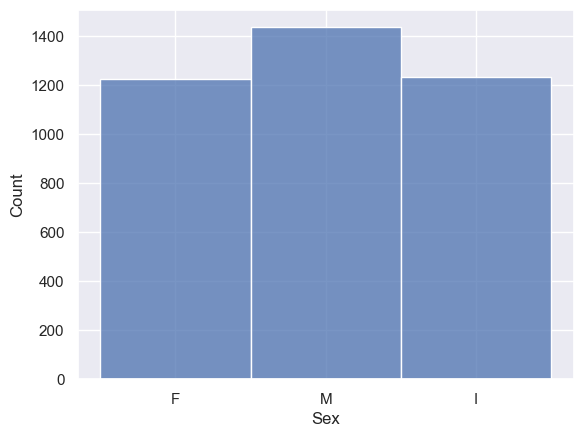

In [123]:
sns.histplot(dataset['Sex'])

Pretty balanced distribution of sexes in the dataset

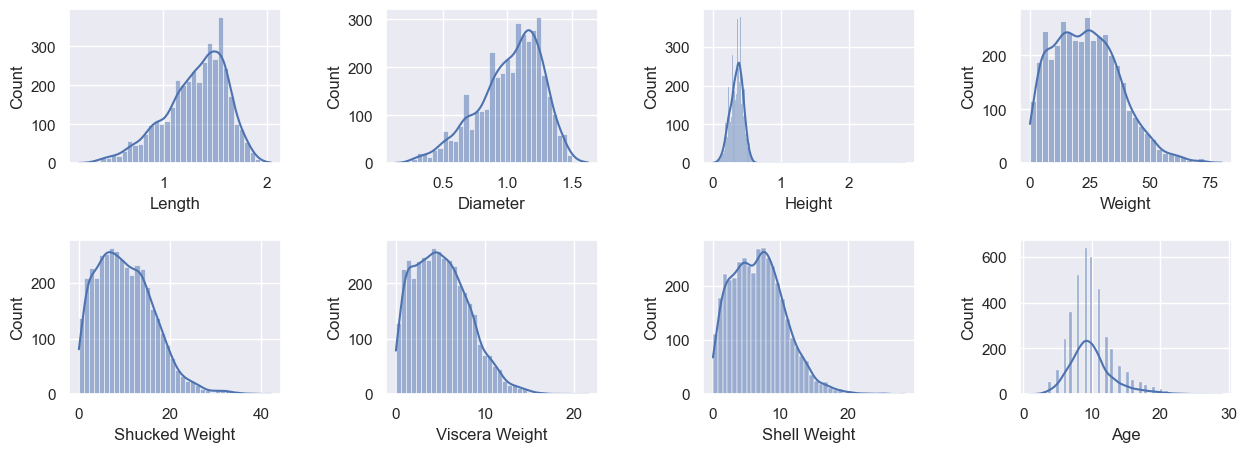

In [124]:
fig, axes = plt.subplots(2, 4, figsize=(15, 5))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

testdataset = dataset.drop('Sex', axis=1)
for i in testdataset.columns:
    if testdataset.columns.get_loc(i) < 4:
        sns.histplot(dataset[i], kde=True, ax=axes[0, testdataset.columns.get_loc(i)])
    else:
        sns.histplot(dataset[i], kde=True, ax=axes[1, (testdataset.columns.get_loc(i) % 4)])  

In [126]:
numberic_dataset = dataset.drop('Sex', axis=1)
for i in numberic_dataset.columns:
    skewness = round(dataset[i].skew(), 3)
    kurtosis = round(dataset[i].kurt(), 3)
    print(f"'{i}' has a skewness of {skewness} and kurtosis of {kurtosis}")
    # add more code to plot these values to visualize comparisons  easier

'Length' has a skewness of -0.651 and kurtosis of 0.077
'Diameter' has a skewness of -0.617 and kurtosis of -0.041
'Height' has a skewness of 3.313 and kurtosis of 80.222
'Weight' has a skewness of 0.519 and kurtosis of -0.023
'Shucked Weight' has a skewness of 0.703 and kurtosis of 0.576
'Viscera Weight' has a skewness of 0.578 and kurtosis of 0.088
'Shell Weight' has a skewness of 0.608 and kurtosis of 0.517
'Age' has a skewness of 1.105 and kurtosis of 2.337


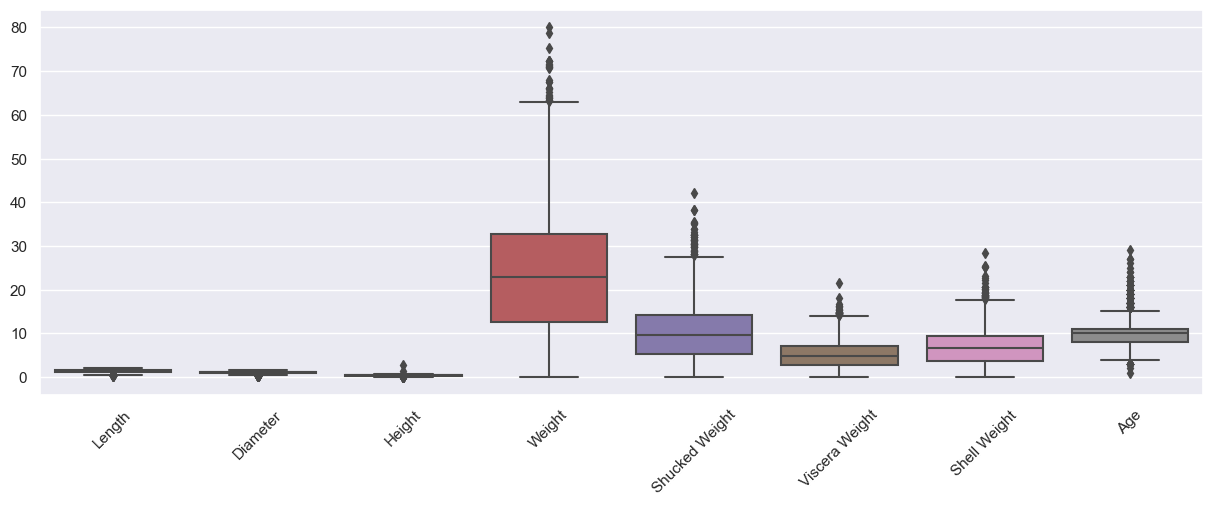

In [138]:
# box and whisker - visual representation of df.describe()
plt.figure(figsize=(15, 5))
sns.boxplot(data=boxplotdata)
plt.xticks(rotation=45)
plt.show()

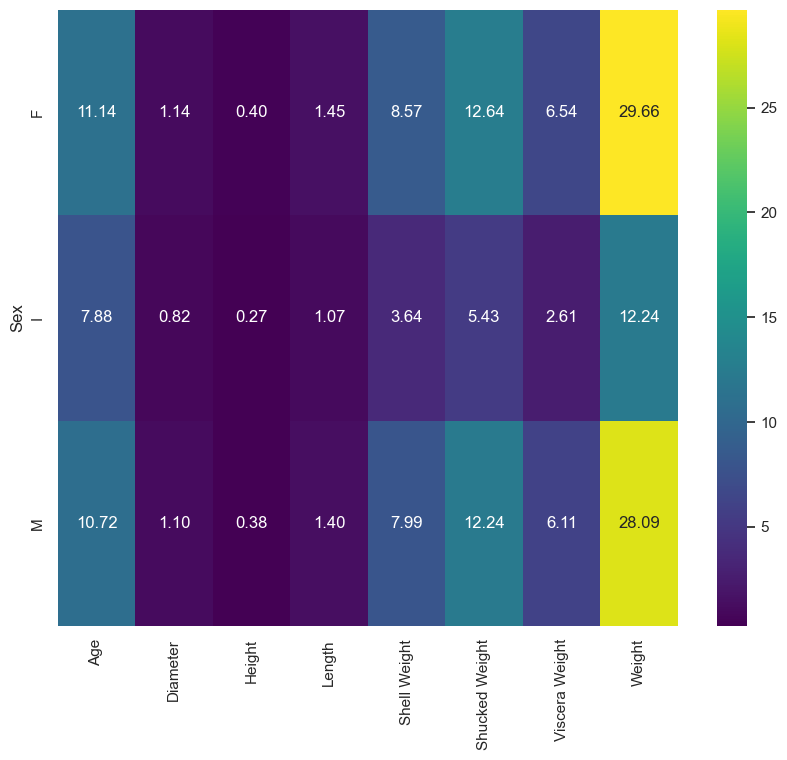

In [196]:
# plot the relationships between averages of numberic features grouped by 'Sex' category
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.pivot_table(index='Sex', aggfunc='mean'), annot=True, cmap='viridis', fmt='.2f')
plt.show()

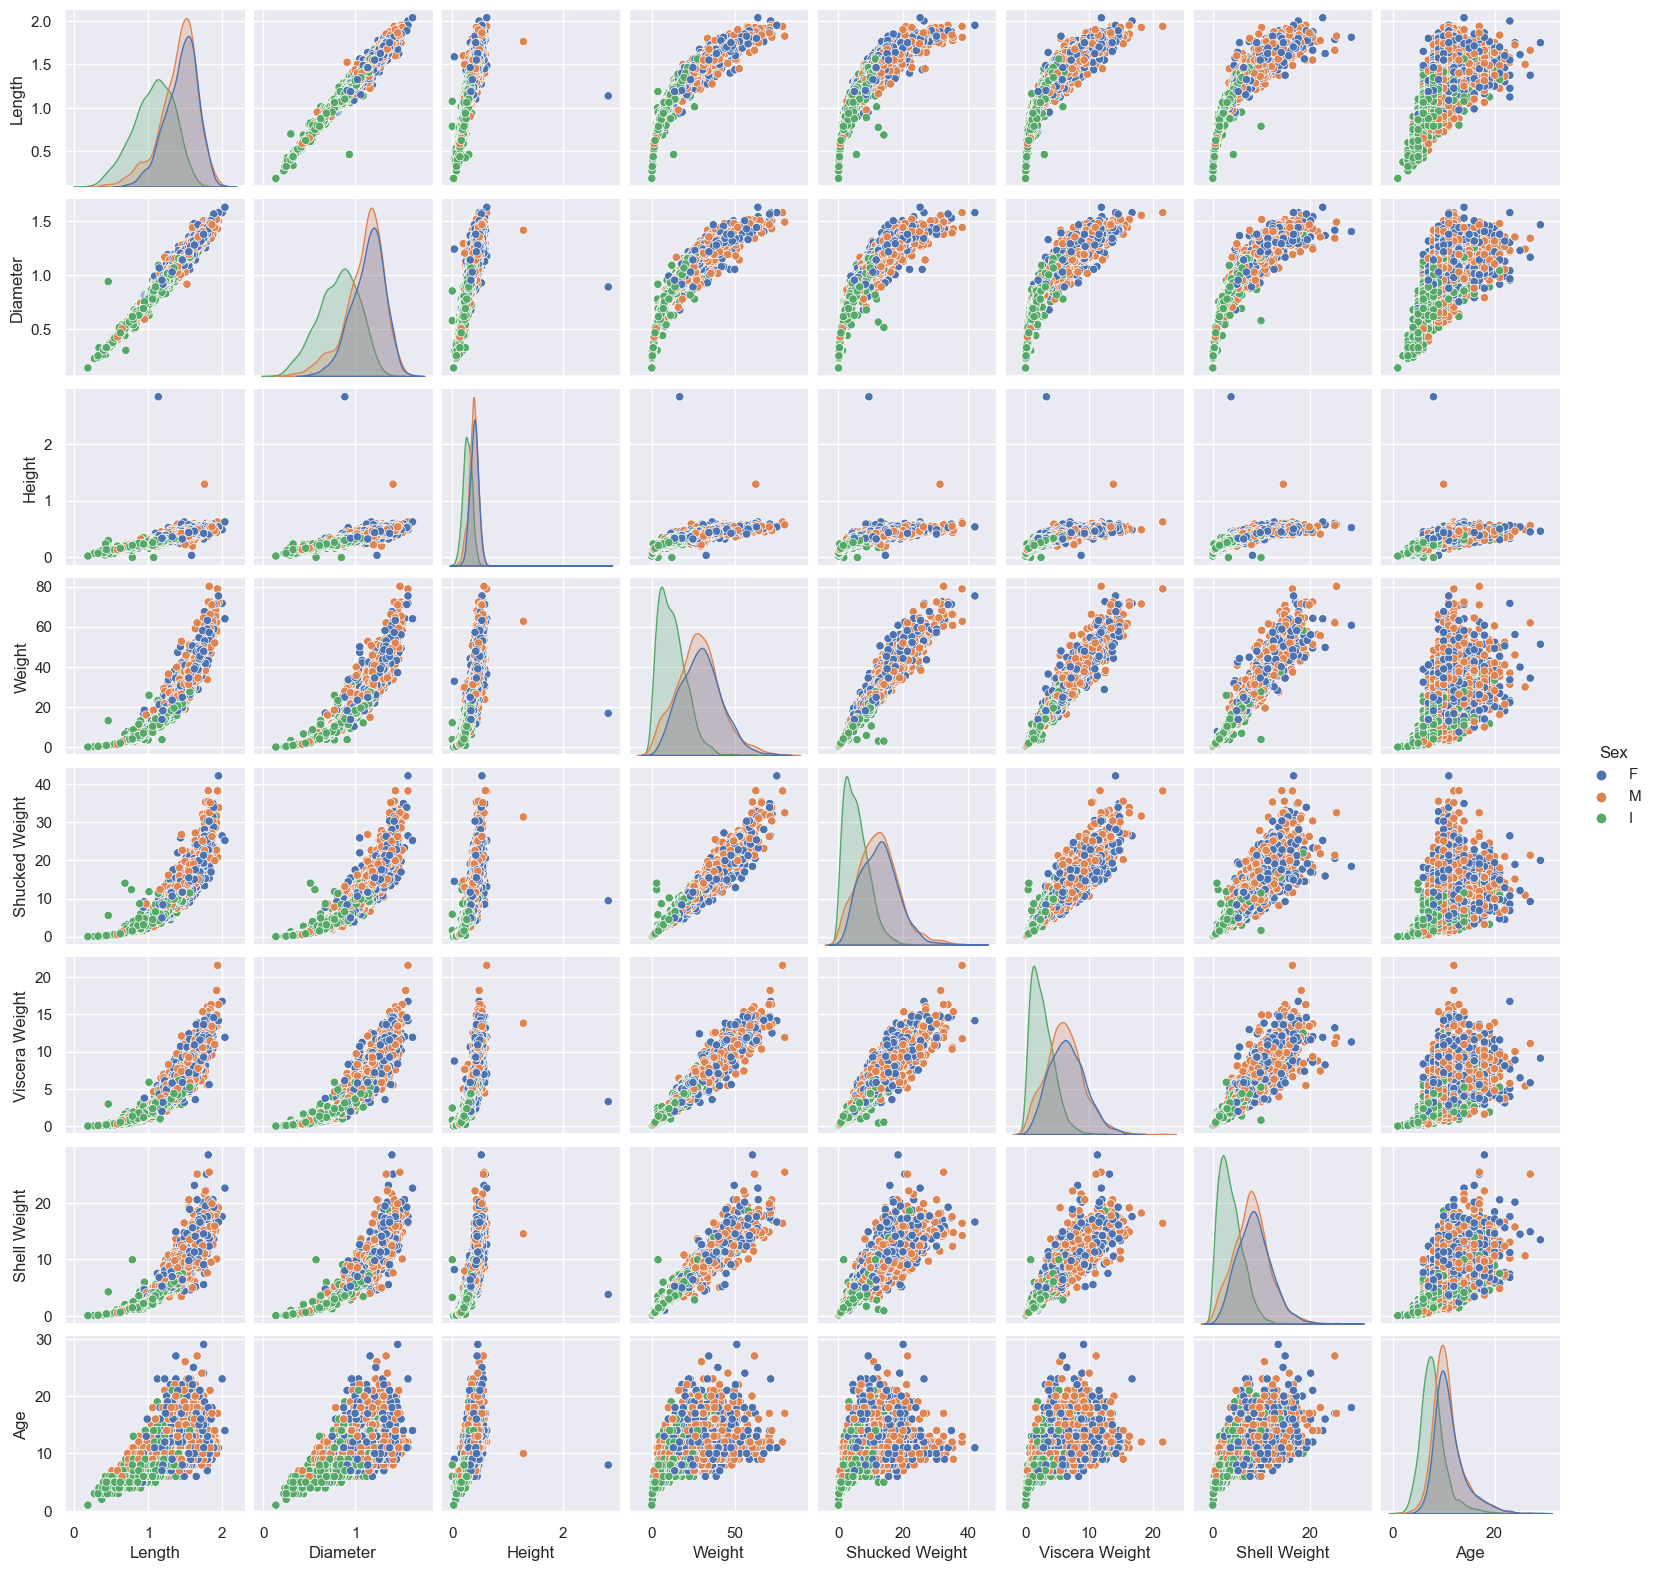

In [140]:
# Multivariate analysis - pariplot to visualize the interactions of the features, grouped by 'Sex' - only categorical variable in the dataset
sns.pairplot(dataset, hue='Sex', height=2)

In [213]:
# Multivariate analysis - Feature correlation strength quantified by Person's R coefficient
correlation_matrix = pd.DataFrame(dataset.corr())
for idx, row in correlation_matrix.iterrows():
    for col in correlation_matrix.columns:
        if correlation_matrix.loc[idx, col] > 0.5:
            correlation_matrix.loc[idx, col] = 'Strong' # categorizations of correlation strength based on Person's R coefficient 
        elif (0.3 < correlation_matrix.loc[idx, col] <= 0.5):
                correlation_matrix.loc[idx, col] = 'Moderate'
        elif (correlation_matrix.loc[idx, col] <= 0.3):
                correlation_matrix.loc[idx, col] = 'Weak'
        else:
            correlation_matrix.loc[idx, col] = 'Undefined'

C:\Users\lannand\AppData\Local\Temp\ipykernel_14216\1638598027.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = pd.DataFrame(dataset.corr())


In [212]:
correlation_matrix

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Length,Strong,Strong,Strong,Strong,Strong,Strong,Strong,Strong
Diameter,Strong,Strong,Strong,Strong,Strong,Strong,Strong,Strong
Height,Strong,Strong,Strong,Strong,Strong,Strong,Strong,Strong
Weight,Strong,Strong,Strong,Strong,Strong,Strong,Strong,Strong
Shucked Weight,Strong,Strong,Strong,Strong,Strong,Strong,Strong,Moderate
Viscera Weight,Strong,Strong,Strong,Strong,Strong,Strong,Strong,Strong
Shell Weight,Strong,Strong,Strong,Strong,Strong,Strong,Strong,Strong
Age,Strong,Strong,Strong,Strong,Moderate,Strong,Strong,Strong


In [223]:
# Multivariate analysis - Feature correlation strength quantified by Person's R coefficient - broken down by categorical feature ('Sex')
grouped_dataset = dataset.groupby('Sex') # create 3 datasets, one for each sex, then look at correlations between features by sex
m_df = grouped_dataset.get_group('M')
f_df = grouped_dataset.get_group('F')
i_df = grouped_dataset.get_group('I')

# Amend the following code and build it all within one loop..... 
m_correlation_matrix = pd.DataFrame(m_df.corr())
for idx, row in m_correlation_matrix.iterrows():
    for col in m_correlation_matrix.columns:
        if m_correlation_matrix.loc[idx, col] > 0.5:
            m_correlation_matrix.loc[idx, col] = 'Strong' # categorizations of correlation strength based on Person's R coefficient 
        elif (0.3 < m_correlation_matrix.loc[idx, col] <= 0.5):
                m_correlation_matrix.loc[idx, col] = 'Moderate'
        elif (m_correlation_matrix.loc[idx, col] <= 0.3):
                m_correlation_matrix.loc[idx, col] = 'Weak'
        else:
            m_correlation_matrix.loc[idx, col] = 'Undefined'

f_correlation_matrix = pd.DataFrame(f_df.corr())
for idx, row in f_correlation_matrix.iterrows():
    for col in f_correlation_matrix.columns:
        if f_correlation_matrix.loc[idx, col] > 0.5:
            f_correlation_matrix.loc[idx, col] = 'Strong'
        elif (0.3 < f_correlation_matrix.loc[idx, col] <= 0.5):
                f_correlation_matrix.loc[idx, col] = 'Moderate'
        elif (f_correlation_matrix.loc[idx, col] <= 0.3):
                f_correlation_matrix.loc[idx, col] = 'Weak'
        else:
            f_correlation_matrix.loc[idx, col] = 'Undefined'

i_correlation_matrix = pd.DataFrame(i_df.corr())
for idx, row in i_correlation_matrix.iterrows():
    for col in i_correlation_matrix.columns:
        if i_correlation_matrix.loc[idx, col] > 0.5:
            i_correlation_matrix.loc[idx, col] = 'Strong'
        elif (0.3 < i_correlation_matrix.loc[idx, col] <= 0.5):
                i_correlation_matrix.loc[idx, col] = 'Moderate'
        elif (i_correlation_matrix.loc[idx, col] <= 0.3):
                i_correlation_matrix.loc[idx, col] = 'Weak'
        else:
            i_correlation_matrix.loc[idx, col] = 'Undefined'

# Use these to assess any differences between correlation strength and category feature (Sex)

C:\Users\lannand\AppData\Local\Temp\ipykernel_14216\3028554641.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  m_correlation_matrix = pd.DataFrame(m_df.corr())
C:\Users\lannand\AppData\Local\Temp\ipykernel_14216\3028554641.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  f_correlation_matrix = pd.DataFrame(f_df.corr())
C:\Users\lannand\AppData\Local\Temp\ipykernel_14216\3028554641.py:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  i_correlation_matrix = pd.DataFrame(

In [233]:
numeric_features = numberic_dataset.columns.to_list() # numberic feature names
differences = []
for i in numeric_features:
    for j in numeric_features:
        i_entry = i_correlation_matrix.loc[i, j]
        f_entry = f_correlation_matrix.loc[i, j]
        m_entry = m_correlation_matrix.loc[i, j]
        if i_entry != f_entry or f_entry != m_entry:
            differences.append({
                'Feature Pair': (i, j),
                'i_correlation_matrix': i_entry,
                'f_correlation_matrix': f_entry,
                'm_correlation_matrix': m_entry
            })

In [234]:
differencesdf = pd.DataFrame(differences)

In [235]:
differencesdf

,Feature Pair,i_correlation_matrix,f_correlation_matrix,m_correlation_matrix
0,"(Length, Age)",Strong,Weak,Moderate
1,"(Diameter, Age)",Strong,Weak,Moderate
2,"(Height, Age)",Strong,Weak,Moderate
3,"(Weight, Age)",Strong,Weak,Moderate
4,"(Shucked Weight, Age)",Strong,Weak,Weak
5,"(Viscera Weight, Age)",Strong,Weak,Moderate
6,"(Shell Weight, Age)",Strong,Moderate,Strong
7,"(Age, Length)",Strong,Weak,Moderate
8,"(Age, Diameter)",Strong,Weak,Moderate
9,"(Age, Height)",Strong,Weak,Moderate


In [72]:
# Check for missing data points and replace any instances with the mean of the field
for i in dataset.columns:
    missing_values = dataset[i].isnull().sum()
    print(f"Missing values in {i}: {missing_values}")

Missing values in Sex: 0
Missing values in Length: 0
Missing values in Diameter: 0
Missing values in Height: 0
Missing values in Weight: 0
Missing values in Shucked Weight: 0
Missing values in Viscera Weight: 0
Missing values in Shell Weight: 0
Missing values in Age: 0


In [9]:
dataset[dataset['Shell Weight'].isnull()] # Can check content of rows with missing data, i.e., for Shell Weight

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
2703,F,1.7375,1.375,0.4625,NaN,22.821348,NaN,NaN,10.0


In [71]:
# Replace missing values with the mean of respective fields
for i in dataset.columns:
    if dataset[i].isnull().sum() > 0:
        index = dataset[dataset[i].isnull()].index
        dataset.loc[index, i] = dataset[i].mean()

In [99]:
# Remove outliers based on z-score
dataset_cols = dataset.columns
dataset_cols = dataset_cols.to_list()
dataset_cols.remove('Sex')

dataset2 = []
for i in dataset_cols:

    print('col name', i)

    z = (np.abs(stats.zscore(dataset[i])))
    z = z.to_list()

    print('zscore list', z)

    for j in z:
        if j > 3:
            z.remove(j)
    dataset2.append(z)

dataset2 = pd.DataFrame(dataset2)

col name Length
zscore list [0.41968027918844825, 1.4110224122681407, 0.9117398600527069, 0.4540641871885599, 1.4110224122681407, 0.7941421933500233, 0.03799539367569879, 0.04521836502687313, 0.9189628314038812, 1.3278086535655684, 1.6190568090245712, 0.17003900308073175, 1.4942361709707126, 0.2116458824320177, 0.2876366697834153, 1.085390348809026, 0.960569710755168, 0.828526101350135, 0.5445009172423069, 1.8270912057810018, 0.6620985839449904, 1.04378346945774, 1.286201774214282, 2.4511943960502935, 0.16281603172955741, 0.16281603172955741, 0.0868252443781591, 0.7109284346474507, 0.8773559520525953, 0.7453123426475631, 0.828526101350135, 0.20442291108084337, 0.16281603172955741, 0.5861077965935928, 0.7941421933500233, 0.2948596411345896, 0.6620985839449904, 0.9949536187552795, 1.8686980851322876, 0.870132980701421, 0.41968027918844825, 1.7022705677271432, 1.2934247455654564, 0.6693215552961648, 0.9117398600527069, 1.3766385042680291, 0.20442291108084337, 1.3766385042680291, 0.2116458